<a href="https://colab.research.google.com/github/PHYS486-S22/PHYS486-S22/blob/main/SampleNotebooks/Saha%2BBoltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Start with the usual imports
%matplotlib inline
import numpy as np
from numpy.random import rand, randint
import matplotlib.pyplot as plt
import math

## Functions to calculate properties of a hydrogen atom

In [3]:
# function to calculate the energy (in electron volts) of 
# a hydrogen atom with an electron in energy level n.

def calcEnergy(n):
    
  #simple hydrogen atom energy level
  energy = -13.6 / (n*n) # in eV

  return energy    

In [4]:
# a function to calculate the probability of an electron 
# inhabiting an energy level n in an environment with temperature T (in Kelvin).

# note that, without iterating over all n, this probability cannot be normalized!
def probEnergy(n,T):

  #calculate the energy of the state
  energy = calcEnergy(n)

  #calculate kT
  k = 8.617342315e-5 #eV/Kelvin
  kT = k*T

  #calculate probability (unnormalized!)
  prob = np.exp(-1.*energy/kT)

  return prob

In [5]:
# a function to calculate the relative probability of two energy levels (n1 and n2), 
# at a given temperature T (in Kelvin).

# this pairwise calculation avoids the issue of infinite normalization that we 
# ran into above.
def relativeProb(n1,n2,T):

  #calculate the energies of the states n1 & n2
  n1energy = calcEnergy(n1)
  n2energy = calcEnergy(n2)

  #calculate kT
  k = 8.617342315e-5 #eV/Kelvin
  kT = k*T

  #calculate relative probabilities of states n1 and n2
  prob_n2_over_n1 = (n2*n2/(n1*n1))*np.exp(-1.*(n2energy - n1energy)/kT)

  return prob_n2_over_n1

## test the functions to calculate probabilities of different energy levels.

In [9]:
#check that energy level calculations are going ok
print(calcEnergy(1))
print(calcEnergy(2))

-13.6
-3.4


In [11]:
#check the relative probabilities at 10 & 100,000 Kelvin
# (expectation is that n=2 / n=1 should be real low at T = 10K, 
# and higher at T = 100,000 K.)
print(relativeProb(1,2,10))
print(relativeProb(1,2,100000))

0.0
1.2246250998327632


In [13]:
# see how we can normalize probabilities by calculating their sum up a given level 
# (and see how the total depends on the level we choose as our ceiling) 

exploreTemp = 10000.

print('i', '   prob. sum')

for i in range(10):
  totalProb = 0.
  for j in range(i):
    totalProb = totalProb + relativeProb(1,j+2,exploreTemp)
  print(i, '   ', totalProb)

i    prob. sum
0     0.0
1     2.8939541267577195e-05
2     3.621259940555731e-05
3     4.221616896409453e-05
4     4.879293696837019e-05
5     5.660206942931724e-05
6     6.60641002712594e-05
7     7.752408440505018e-05
8     9.12965690342945e-05
9     0.00010768169482092463


## functions to create a monte carlo markov chain simulation of the atom

In [14]:
# a function that conducts a random draw of the relative probability of an input electron energy 
# level (n) and a randomly selected level below some maximum (ceiling), at a given 
# input temperature T (in Kelvin).  Based on the random draw and the relative 
# probabilities of the two levels, the atom will either stay in the current 
# energy level n, or switch to the randomly selected level.  Output is the n 
# value of the electron's energy level after this evaluation.

def HydrogenStep(n, ceiling, temp):

  #randomly select a level to check if the atom will transition into it.
  next_level = randint(1,ceiling)

  #calculate the probability of making this switch.
  #need to remember that n2/n1 might be larger than 1 (if gas is hot enough 
  #that electron is likely to be excited) but probability of being in state
  #n2 can't actually be larger than 1, so need to divide by n2/n1 + 1 (where 
  #1 = n1/n1). 

  switch_chance = relativeProb(n, next_level, temp)/(1.+relativeProb(n, next_level, temp))

  #randomly select a floating point value between 0 and 1
  check = rand()

  #decide if we make the switch
  if (check < switch_chance):
    end = next_level
  else:
    end = n

  return end

In [15]:
# a function that constructs an MCMC chain of the energy levels an electron
# would occupy in an environment with temperature = temp (in Kelvin).  The chain
# will be nsteps long, and only levels between 1 and ceiling will be considered.

def HydrogenWalk(steps, ceiling, temp):

  #set up an array to save our ns in each step.
  n = np.zeros(steps)

  #set up the atom in the ground state
  n[0] = 1

  for i in range(steps-1):
    n[i+1] = HydrogenStep(n[i], ceiling, temp)

  return n

In [16]:
# a function that searches an MCMC chain output (levelArray) by the HydrogenWalk 
# function for entries matching an input level nSought

def findLevelFrac(nSought, levelArray):
  
  #search for elements in levelArray with value == nSought
  in_state = np.nonzero(levelArray == nSought)

  #calculate the number and fraction of the array in this state
  absolute_in_state = len(in_state[0])
  fraction_in_state = absolute_in_state / len(levelArray)

  return fraction_in_state, absolute_in_state

### Test our MCMC functions by simulating the equilibrium energy levels for cold (T = 10 K) and hot (T = 100,000 K) hydrogren atoms.

mean n @ 10K:  1.0
 
fraction of the chain in the ground state:  1.0
absolute number of atoms in the ground state: 100000
 
first 101 states in the chain:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
 
histogram of all energy levels in the chain:


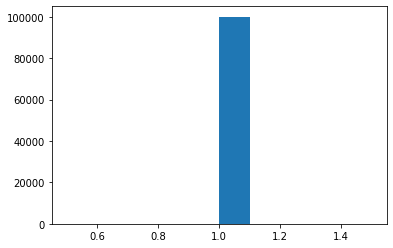

In [23]:
hydrogenCold = HydrogenWalk(100000, 100, 10.)
coldFraction, coldAbsolute = findLevelFrac(1, hydrogenCold)
print('mean n @ 10K: ', np.mean(hydrogenCold))
print(' ')
print('fraction of the chain in the ground state: ', coldFraction)
print('absolute number of atoms in the ground state:', coldAbsolute)
print(' ')
print('first 101 states in the chain:')
print(hydrogenCold[0:100])
print(' ')
print('histogram of all energy levels in the chain:')
plt.hist(hydrogenCold)
plt.show()

mean n @ 100,000 K:  74.76946
 
fraction of the chain in the ground (n=1) state:  5e-05
absolute number of atoms in the ground (n=1) state: 5
 
fraction of the chain in the n=2 state:  3e-05
absolute number of atoms in the n=2 state: 3
 
first 101 states in the chain:
[ 1. 44. 45. 45. 87. 87. 87. 87. 87. 87. 87. 87. 87. 87. 75. 75. 75. 75.
 91. 91. 91. 74. 58. 58. 92. 92. 92. 60. 60. 60. 75. 75. 75. 80. 80. 80.
 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 92. 92.
 92. 92. 92. 92. 92. 92. 92. 92. 98. 98. 98. 98. 98. 98. 98. 58. 58. 64.
 64. 64. 43. 82. 51. 51. 51. 51. 51. 51. 69. 69. 69. 69. 69. 69. 69. 69.
 77. 77. 77. 96. 96. 72. 72. 67. 67. 67.]
 
histogram of all energy levels in the chain:


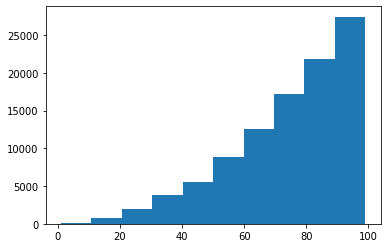

In [25]:
hydrogenHot = HydrogenWalk(100000, 100, 100000.)
hotFractionOne, hotAbsoluteOne = findLevelFrac(1, hydrogenHot)
hotFractionTwo, hotAbsoluteTwo = findLevelFrac(2, hydrogenHot)
print('mean n @ 100,000 K: ', np.mean(hydrogenHot))
print(' ')
print('fraction of the chain in the ground (n=1) state: ', hotFractionOne)
print('absolute number of atoms in the ground (n=1) state:', hotAbsoluteOne)
print(' ')
print('fraction of the chain in the n=2 state: ', hotFractionTwo)
print('absolute number of atoms in the n=2 state:', hotAbsoluteTwo)
print(' ')
print('first 101 states in the chain:')
print(hydrogenHot[0:100])
print(' ')
print('histogram of all energy levels in the chain:')
plt.hist(hydrogenHot)
plt.show()

### Use Saha Equation to allow atom to ionize (electron will go to n=0)

In [26]:
# The Saha equation solved for electron density, returns the
# ionization fraction nH+/nHtotal of ionized to ground-state atoms
# given electron density ne (electrons/cm^3), temperature t in kelvins, partition functions
# u1 and u2, and ionization energy ei of ion i from the fundamental level in eV
# (only works for hydrogen or if you can neglect ionizations after the first)

#borrowed from https://github.com/davidvgalbraith/astrophysics/blob/master/saha.py

def saha(u1, u2, ei, t, ne):
    k = 8.617342315e-5 #eV/Kelvin
    constant = 1.8*10**10 #2 * pi * electron mass * k / h^2
    ratio = (1/ne) * ((constant * t)**1.5) * ((2 * u2) / u1) * (math.e ** (-1 * ei/(k*t))) #equation 1.38
    return ratio / (1 + ratio) #equation 1.40

In [57]:
# a copy of the HydrogenStep function from above (so similiarly taking as inputs
# the electron's initial energy level n, the ceiling level to consider, and the
# temp of the environment in Kelvin), but using a random draw against the Saha 
# equation to check at each step if the electron ionizes.  Since the Saha 
# equation depends on the electron density, that is a new input here (ne, 
# expressed as a number density per cubic cm.) 

def HydrogenStepWithIonization(n, ceiling, temp, ne):

  #first use the Saha Equation to check if the atom will ionize or not.
  ionization_chance = saha(1, 2, -calcEnergy(1), temp, ne)
  #print(ionization_chance)

  #randomly select a floating point value between 0 and 1
  check = rand()

  #decide if we are ionized or not
  if (check < ionization_chance):
    end = 0
  else:
    #randomly select a level to check if the atom will transition into it.
    next_level = randint(1,ceiling)

    #if the atom was ionized at the beginning of this step, 
    #randomly choose a level that it recombines to
    if (n == 0):
      n= randint(1,ceiling)

    #calculate the probability of making this switch.
    #need to remember that n2/n1 might be larger than 1 (if gas is hot enough 
    #that electron is likely to be excited) but probability of being in state
    #n2 can't actually be larger than 1, so need to divide by n2/n1 + 1 (where 
    #1 = n1/n1). 
    switch_chance = relativeProb(n, next_level, temp)/(1.+relativeProb(n, next_level, temp))

    #randomly select a floating point value between 0 and 1
    check_again = rand()

    #decide if we make the switch
    if (check_again < switch_chance):
      end = next_level
    else:
      end = n

  return end

In [38]:
def HydrogenWalkWithIonization(steps, ceiling, temp, ne):

  #for reference, print the electron pressure
  k = 1.38e-23 #joules / K
  kT = k*temp #joules
  #print('pe: ',ne*1e6*kT) #multiplication term converts ne from e / cm^3 to m^3

  #set up an array to save our ns in each step.
  n = np.zeros(steps)

  #set up the atom in the ground state
  n[0] = 1

  for i in range(steps-1):
    n[i+1] = HydrogenStepWithIonization(n[i], ceiling, temp, ne)

  return n

### test our MCMC chain with ionization implemented

mean n @ 10K:  1.0
 
fraction of the chain in the ground (n=1) state:  1.0
absolute number of atoms in the ground (n=1) state: 100000
 
fraction of the chain in the ionized (n=0) state:  0.0
absolute number of atoms in the ionized (n=0) state: 0
 
first 101 states in the chain:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
 
histogram of all energy levels in the chain:


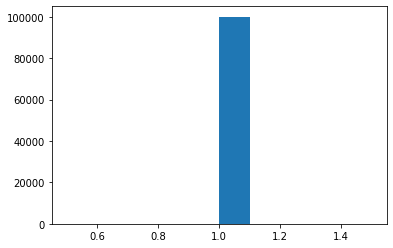

In [50]:
nsteps = 100000
ceiling = 10
cold = 10.
ne = 3e12

hydrogenColdIon = HydrogenWalkWithIonization(nsteps, ceiling, cold, ne)
coldFractionIon, coldAbsoluteIon = findLevelFrac(1, hydrogenColdIon)
coldFractionIonized, coldAbsoluteIonized = findLevelFrac(0, hydrogenColdIon)
print('mean n @ 10K: ', np.mean(hydrogenColdIon))
print(' ')
print('fraction of the chain in the ground (n=1) state: ', coldFractionIon)
print('absolute number of atoms in the ground (n=1) state:', coldAbsoluteIon)
print(' ')
print('fraction of the chain in the ionized (n=0) state: ', coldFractionIonized)
print('absolute number of atoms in the ionized (n=0) state:', coldAbsoluteIonized)
print(' ')
print('first 101 states in the chain:')
print(hydrogenColdIon[0:100])
print(' ')
print('histogram of all energy levels in the chain:')
plt.hist(hydrogenColdIon)
plt.show()

mean n @ 7000.0  K:  2.41106
 
fraction of the chain in the ground (n=1) state:  0.31956
absolute number of atoms in the ground (n=1) state: 31956
 
fraction of the chain in the ionized (n=0) state:  0.23238
absolute number of atoms in the ionized (n=0) state: 23238
 
first 101 states in the chain:
[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 3. 3. 0. 0. 8. 4. 8. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 4. 3. 3. 2. 2. 0. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 9. 9. 9. 0. 2. 2. 0. 8. 0. 3. 6.
 6. 0. 9. 0. 7. 2. 2. 2. 9. 7. 0. 6. 0. 6. 6. 6. 0. 0. 6. 0. 0. 3. 3. 3.
 0. 0. 6. 6.]
 
histogram of all energy levels in the chain:


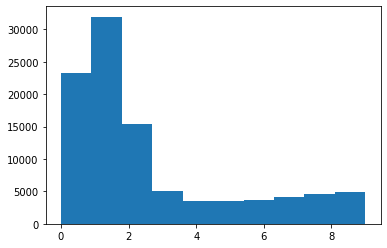

In [58]:
nsteps = 100000
ceiling = 10
hot = 7000.
ne = 3e12

hydrogenHotIon = HydrogenWalkWithIonization(nsteps, ceiling, hot, ne)
HotFractionIon, HotAbsoluteIon = findLevelFrac(1, hydrogenHotIon)
HotFractionIonized, HotAbsoluteIonized = findLevelFrac(0, hydrogenHotIon)
print('mean n @', hot, ' K: ', np.mean(hydrogenHotIon))
print(' ')
print('fraction of the chain in the ground (n=1) state: ', HotFractionIon)
print('absolute number of atoms in the ground (n=1) state:', HotAbsoluteIon)
print(' ')
print('fraction of the chain in the ionized (n=0) state: ', HotFractionIonized)
print('absolute number of atoms in the ionized (n=0) state:', HotAbsoluteIonized)
print(' ')
print('first 101 states in the chain:')
print(hydrogenHotIon[0:100])
print(' ')
print('histogram of all energy levels in the chain:')
plt.hist(hydrogenHotIon)
plt.show()